In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, least_squares, curve_fit
from scipy.stats import poisson, chi2, f, mode

In [21]:
beta = 0.0281687763691
A = 0.0040887327835
def psd(f,alpha):
    return A/(f**2+(alpha/(2*np.pi*beta))**2)

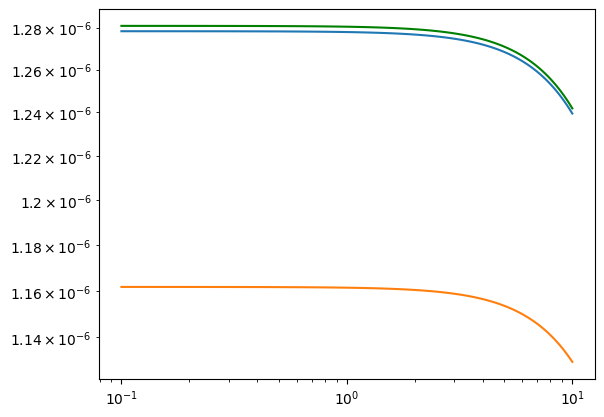

In [22]:
plt.plot(np.linspace(0.1,10,100), psd(np.linspace(0.1,10,100),10), color='green') 
plt.yscale('log')
plt.xscale('log')

plt.plot(np.linspace(0.1,10,100), psd(np.linspace(0.1,10,100),10.01)) 
plt.yscale('log')
plt.xscale('log')

plt.plot(np.linspace(0.1,10,100), psd(np.linspace(0.1,10,100),10.5)) 
plt.yscale('log')
plt.xscale('log')